<a href="https://colab.research.google.com/github/nermienkh/BMD212_Spring22/blob/main/EEG_Visualization_and_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne

In [207]:
mne.utils.set_config('MNE_USE_CUDA', 'true')

src1:https://neuro.inf.unibe.ch/AlgorithmsNeuroscience/Tutorial_files/DataLoading.html
<br>
src2:https://medium.com/@vishal.mi19/processing-eeg-data-with-python-8036fd7336ca
<br>
1.1) Loading datasets available in MNE: EEGBCI motor imagery Dataset

We start with a dataset that is already available in the MNE package (EEGBI motor imagery dataset). The dataset contains 64-channel EEG recordings from 109 participants and 14 runs on each participant in EDF+ format. For more details please check https://www.nmr.mgh.harvard.edu/mne/stable/manual/datasets_index.html#eegbci-motor-imagery.

In order to load a dataset in MNE, we need to provide a participant id or a list of participant ids, a list of runs (tasks) and path to locate data should be provided as arguments to load_data() function.

The function load_data() returns a list of paths that the requested data files located.



In order to load a dataset in MNE, we need to provide a participant id or a list of participant ids, a list of runs (tasks) and path to locate data should be provided as arguments to load_data() function.

The function load_data() returns a list of paths that the requested data files located.

Another way to load data is by using the read_raw_edf() function. This will load downloaded edf files and concatenate the raw data in each edf file to have the final dataset with all the selected runs.



The EDF format (stands for European Data Format) was designed to store medical time series data, it is most commonly used for EEG data. A non-breaking extension was added in 2003 called EDF+. It is an open documented standard that is agnostic to any recording system or hardware/software supplier.

In [209]:
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf

#Define the parameters 
subject = 1  # use data from subject 1
runs = [6, 10, 14]  # use only hand and feet motor imagery runs, Motor imagery is a cognitive process in which a subject imagines that he=she performs a movement without actually performing the movement and without even tensing the muscles

#Get data and locate in to given path
files = eegbci.load_data(subject, runs, '../datasets/')
#Read raw data files where each file contains a run
raws = [read_raw_edf(f, preload=True) for f in files]
#Combine all loaded runs
raw_obj = concatenate_raws(raws)

Extracting EDF parameters from /datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


In [210]:
raw_obj

<RawEDF | S001R06.edf, 64 x 60000 (375.0 s), ~29.4 MB, data loaded>

In [211]:
dir(raw_obj)

['__class__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_annotations',
 '_cals',
 '_check_bad_segment',
 '_comp',
 '_cropped_samp',
 '_data',
 '_dtype',
 '_dtype_',
 '_filenames',
 '_first_samps',
 '_first_time',
 '_get_buffer_size',
 '_get_channel_positions',
 '_getitem',
 '_handle_tmin_tmax',
 '_init_kwargs',
 '_last_samps',
 '_last_time',
 '_orig_units',
 '_parse_get_set_params',
 '_pick_drop_channels',
 '_pick_projs',
 '_preload_data',
 '_projector',
 '_projectors',
 '_raw_extras',
 '_raw_lengths',
 '_read_comp_grade',
 '_read_picks',
 '_read_segment',
 '_

If we know the channels in which we are interested than we can directly pick the channels by passing there names as  a list

In [212]:
#raw_data = raw_obj.get_data()
# OR
raw_data = raw_obj._data
print("Number of channels: ", str(len(raw_data)))
print("Number of samples: ", str(len(raw_data[0])))

Number of channels:  64
Number of samples:  60000


In [213]:
raw_data.shape

(64, 60000)

In [214]:
raw_data

array([[ 7.30e-05,  6.30e-05,  8.20e-05, ...,  0.00e+00,  0.00e+00,
         0.00e+00],
       [ 7.30e-05,  6.40e-05,  7.40e-05, ...,  0.00e+00,  0.00e+00,
         0.00e+00],
       [ 9.10e-05,  7.80e-05,  8.20e-05, ...,  0.00e+00,  0.00e+00,
         0.00e+00],
       ...,
       [-4.00e-06,  4.00e-06, -3.00e-06, ...,  0.00e+00,  0.00e+00,
         0.00e+00],
       [ 5.90e-05,  6.90e-05,  6.50e-05, ...,  0.00e+00,  0.00e+00,
         0.00e+00],
       [-9.20e-05, -9.30e-05, -1.02e-04, ...,  0.00e+00,  0.00e+00,
         0.00e+00]])

In [215]:
#get channel names
raw_obj.ch_names

['Fc5.',
 'Fc3.',
 'Fc1.',
 'Fcz.',
 'Fc2.',
 'Fc4.',
 'Fc6.',
 'C5..',
 'C3..',
 'C1..',
 'Cz..',
 'C2..',
 'C4..',
 'C6..',
 'Cp5.',
 'Cp3.',
 'Cp1.',
 'Cpz.',
 'Cp2.',
 'Cp4.',
 'Cp6.',
 'Fp1.',
 'Fpz.',
 'Fp2.',
 'Af7.',
 'Af3.',
 'Afz.',
 'Af4.',
 'Af8.',
 'F7..',
 'F5..',
 'F3..',
 'F1..',
 'Fz..',
 'F2..',
 'F4..',
 'F6..',
 'F8..',
 'Ft7.',
 'Ft8.',
 'T7..',
 'T8..',
 'T9..',
 'T10.',
 'Tp7.',
 'Tp8.',
 'P7..',
 'P5..',
 'P3..',
 'P1..',
 'Pz..',
 'P2..',
 'P4..',
 'P6..',
 'P8..',
 'Po7.',
 'Po3.',
 'Poz.',
 'Po4.',
 'Po8.',
 'O1..',
 'Oz..',
 'O2..',
 'Iz..']

If we know the channels in which we are interested than we can directly pick the channels by passing there names as  a list.
notice the convetion on naming (each name should contains 4 characters, first one capital, then small then number and finally dot(.). ) 

In [216]:
raw_obj.pick_channels(['Fc6.', 'Ft8.', 'C5..', 'Cp3.', 'P3..', 'T7..', 'Cp5.', 'C3..', 'Cp1.', 'C4..'])

<RawEDF | S001R06.edf, 10 x 60000 (375.0 s), ~4.6 MB, data loaded>

above mentioned channels are from Broca’s and Wernick’s area of brain which are responsible for speech processing. For sake of preprocessing we do not use the noisiest channel in our data here noisiest means the channel which have too much spikes or no spikes. EEG data has four bands divided according to the frequency range Delta, Alpha, Theta, Beta we can pick a frequency band and can filter raw data according to our requirement.

In [217]:
raw_data= raw_obj._data

In [218]:
raw_data.shape

(10, 60000)

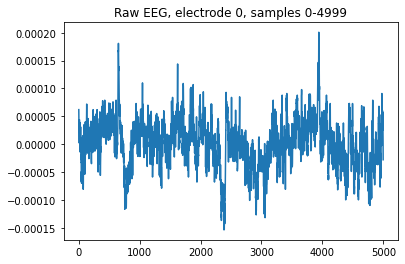

In [219]:
plt.plot(raw_data[0,:4999])
plt.title("Raw EEG, electrode 0, samples 0-4999")
plt.show()

## Frequency Filters <br>
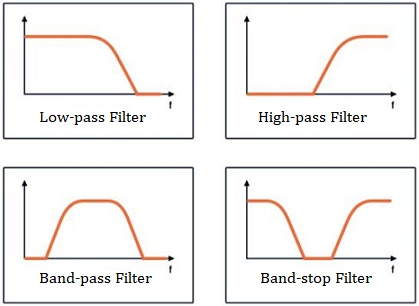

# Brain waves bands 
<br>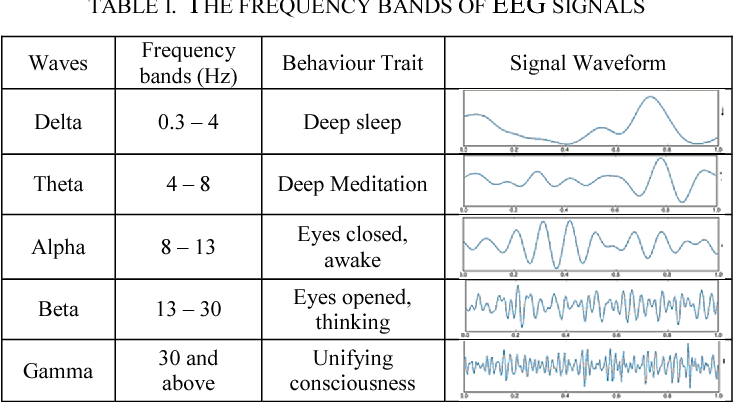

In [220]:
#band pass filter 
low_freq, high_freq = 12.0, 35.0 # values in Hz
raw_data_filtered = raw_obj.filter(low_freq, high_freq, n_jobs=4)

Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 12 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 12.00
- Lower transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 10.50 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 177 samples (1.106 sec)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    3.9s finished


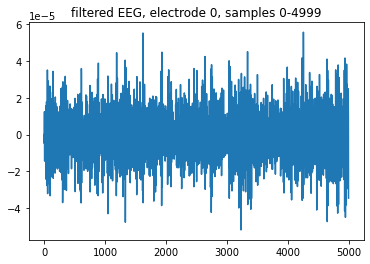

In [221]:
plt.plot(raw_data_filtered.get_data()[0,:4999])
plt.title("filtered EEG, electrode 0, samples 0-4999")
plt.show()

In [225]:
raw_data_filtered

<RawEDF | S001R06.edf, 10 x 60000 (375.0 s), ~4.6 MB, data loaded>

In [226]:
#subtract mean of all channels with each channel to remove artifacts.
def Artifact_removal(original_data):
    new_data = original_data.copy()
    new_signals=np.zeros(new_data._data.shape)
    data=new_data.get_data()
    avg_data = np.mean(data, axis=1)#get mean of each raw 
    avg_data= np.mean(avg_data) #get mean of all rows
    for i in range(len(data)):
        val = data[i]-avg_data
        new_signals[i]=val
    new_data._data=new_signals
    return new_data

In [227]:
new_datax=Artifact_removal(raw_data_filtered)

In [228]:
new_datax.get_data()

array([[-1.86934116e-10, -2.47208219e-06, -4.76559950e-06, ...,
        -1.40322280e-07, -7.90058879e-08, -1.86934116e-10],
       [-1.86934116e-10,  1.14336323e-05,  2.51797628e-06, ...,
        -2.11817656e-07, -1.19834951e-07, -1.86934117e-10],
       [-1.86934116e-10,  1.33385422e-05,  2.87744580e-06, ...,
        -2.04921756e-07, -1.16799619e-07, -1.86934117e-10],
       ...,
       [-1.86934116e-10,  2.61691308e-06,  3.10995771e-06, ...,
        -1.11296120e-07, -6.43587666e-08, -1.86934117e-10],
       [-1.86934117e-10,  1.69125892e-05,  8.32117295e-06, ...,
        -1.18522813e-07, -7.07560466e-08, -1.86934117e-10],
       [-1.86934117e-10,  5.29008643e-06, -3.62887402e-06, ...,
        -1.93317375e-07, -1.11281570e-07, -1.86934117e-10]])

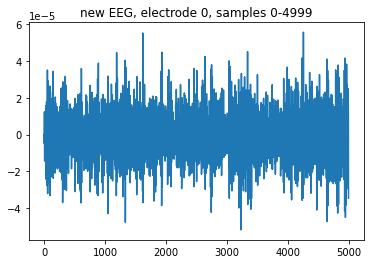

In [229]:
plt.plot(new_datax.get_data()[0,:4999])
plt.title("new EEG, electrode 0, samples 0-4999")
plt.show()

Opening raw-browser...


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


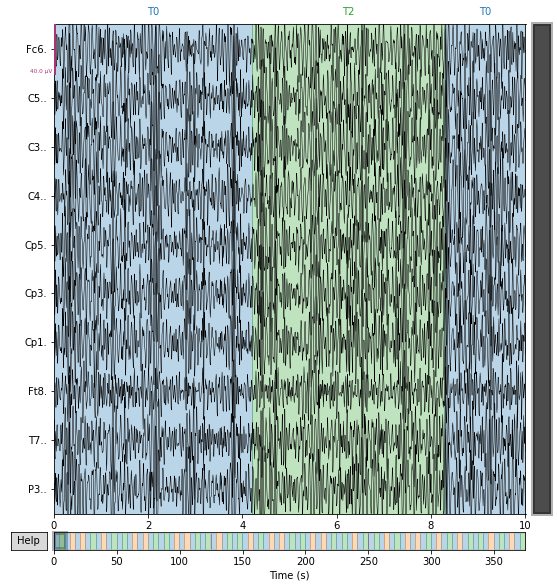

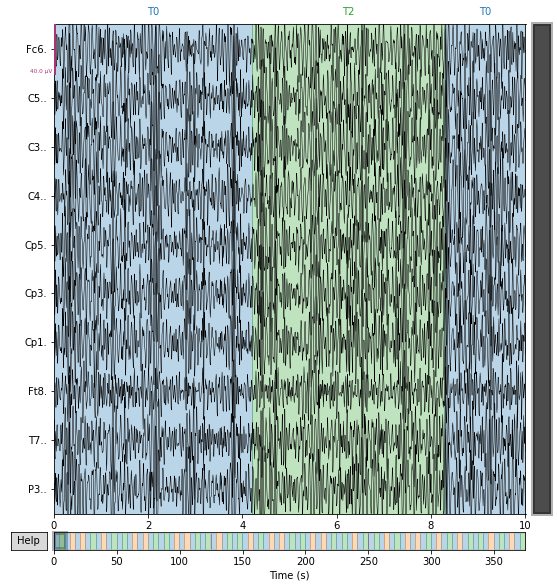

In [230]:
#MNE interactive plots are not working in the Colab environment, but you can follow this link if you are interested in generating interactive plots 
#https://stackoverflow.com/a/64455963/9204304
new_datax.plot()

# Frequency domain 

In [231]:
new_datax.info["sfreq"]* (6*60+15)

60000.0

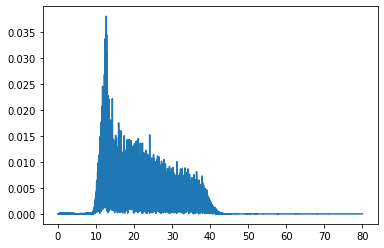

In [232]:
from scipy.fft import rfft, rfftfreq

# Number of samples in normalized_tone
#N = SAMPLE_RATE * DURATION
N = int(new_datax.info["sfreq"])* (6*60+15)
yf = rfft(new_datax.get_data()[0])
xf = rfftfreq(N, 1 / int(new_datax.info["sfreq"]))

plt.plot(xf, np.abs(yf))
plt.show()


# Application:Brain Computer interface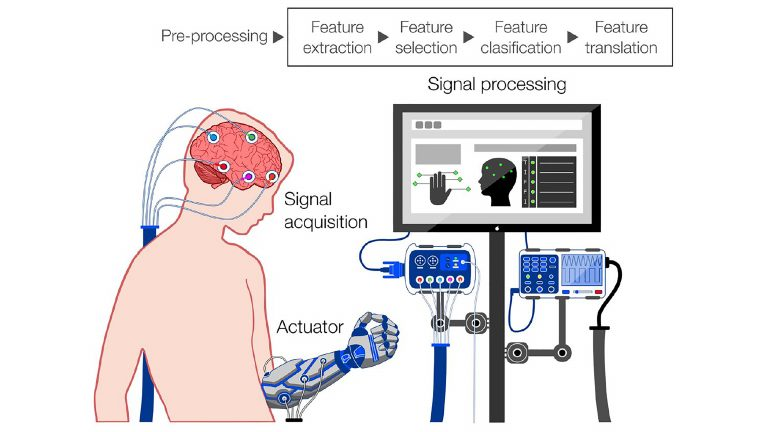
<br>
src: https://publishing.aip.org/publications/latest-content/bleak-cyborg-future-from-brain-computer-interfaces-if-were-not-careful/

 


[BCI Video](https://youtu.be/24geifaD0IY?t=473)